## Face Attribute model
### Model Training
Reference  
https://medium.com/@vijayabhaskar96/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dense

from keras.utils import plot_model
from keras.utils import np_utils

from keras.callbacks import EarlyStopping
pd.set_option('display.max_columns', 500)


In [3]:
df = pd.read_csv('list_attr_celeba.csv')

In [4]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [5]:
import glob
## Attachhing label to correct file names
item_list = glob.glob('face/*/*.jpg')
item_df = pd.DataFrame({'split':pd.Series(item_list).apply(lambda x: x.split('/')[-2])})
item_df['image_id'] = pd.Series(item_list).apply(lambda x: x.split('/')[-1])

In [6]:
item_df.head()

,split,image_id
0,validation,193919.jpg
1,validation,184672.jpg
2,validation,198061.jpg
3,validation,190474.jpg
4,validation,183447.jpg


In [7]:
label_df = df.merge(item_df, on='image_id', how='inner')

In [8]:
label_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,split
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1,training
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,training
2,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,training
3,000006.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,training
4,000007.jpg,1,-1,1,1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,training


In [9]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175620 entries, 0 to 175619
Data columns (total 42 columns):
image_id               175620 non-null object
5_o_Clock_Shadow       175620 non-null int64
Arched_Eyebrows        175620 non-null int64
Attractive             175620 non-null int64
Bags_Under_Eyes        175620 non-null int64
Bald                   175620 non-null int64
Bangs                  175620 non-null int64
Big_Lips               175620 non-null int64
Big_Nose               175620 non-null int64
Black_Hair             175620 non-null int64
Blond_Hair             175620 non-null int64
Blurry                 175620 non-null int64
Brown_Hair             175620 non-null int64
Bushy_Eyebrows         175620 non-null int64
Chubby                 175620 non-null int64
Double_Chin            175620 non-null int64
Eyeglasses             175620 non-null int64
Goatee                 175620 non-null int64
Gray_Hair              175620 non-null int64
Heavy_Makeup           175620 non

In [10]:
len(label_df.columns)

42

In [11]:
for i in range(1,len(label_df.columns)):
    label_df.iloc[:,i].replace(to_replace=-1,value=0, inplace=True)

In [12]:
label_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,split
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,training
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,training
2,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,training
3,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,training
4,000007.jpg,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,training


In [13]:
label_df['split'].value_counts()

training      158144
validation     17476
Name: split, dtype: int64

In [14]:
label_df['label'] = label_df.apply(lambda x: list(x[1:41]),axis=1)

In [15]:
label_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,split,label
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,training,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,training,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
2,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,training,"[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,training,"[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,000007.jpg,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,training,"[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, ..."


In [16]:
################################################################################
# Read the data
################################################################################

In [17]:
plt.imread('face/training/'+os.listdir('face/training')[0]).shape

(195, 195, 3)

In [18]:
label_df_new = label_df.copy()

In [19]:
label_df_new = label_df_new.iloc[:,0:41]

In [20]:
label_df_new.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
4,000007.jpg,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [25]:
label_df_new.to_csv('label_new.csv')

## Multi-label image classification Tutorial with Keras ImageDataGenerator
https://medium.com/@vijayabhaskar96/multi-label-image-classification-tutorial-with-keras-imagedatagenerator-cd541f8eaf24

In [21]:
label_df_new.columns[1:]

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [22]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

columns = label_df_new.columns[1:]

train_generator=datagen.flow_from_dataframe(
dataframe=label_df,
directory="face/training",
x_col="image_id",
y_col=columns,
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(200,200))

Found 118608 images.


In [23]:
valid_generator=datagen.flow_from_dataframe(
dataframe=label_df,
directory="face/training",
x_col="image_id",
y_col=columns,
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="other",
target_size=(200,200))

Found 39536 images.


In [24]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=label_df,
directory="face/validation/",
x_col="image_id",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(200,200))

Found 17476 images.


In [43]:
################################################################################
# Build the model
################################################################################
input_shape_img = (200, 200 ,3)
batch_size = 32
num_epochs = 100
num_classes = 40
conv_size = 32

# print(" >>> input_shape_img = ", input_shape_img)

#-------------------------------------------------------------------------------
model = Sequential()

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(num_classes, activation='sigmoid'))

#-------------------------------------------------------------------------------
model.compile(loss='binary_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])
              
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        9248      
__________

In [48]:
################################################################################
# Train the model
################################################################################
print(" >>> CNN Model Training ... \n")

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
 
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=4,
                    verbose=1,
                    callbacks=[early_stop])

 >>> CNN Model Training ... 

Epoch 1/4
3706/3706 [==============================] - 1029s 278ms/step - loss: 0.3404 - acc: 0.8478 - val_loss: 0.3011 - val_acc: 0.8673
Epoch 2/4
3706/3706 [==============================] - 906s 244ms/step - loss: 0.2794 - acc: 0.8767 - val_loss: 0.2682 - val_acc: 0.8810
Epoch 3/4
3706/3706 [==============================] - 905s 244ms/step - loss: 0.2590 - acc: 0.8855 - val_loss: 0.2556 - val_acc: 0.8876
Epoch 4/4
3706/3706 [==============================] - 906s 244ms/step - loss: 0.2482 - acc: 0.8901 - val_loss: 0.2446 - val_acc: 0.8919


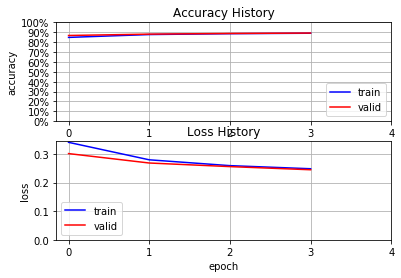

In [55]:
################################################################################
# Check the history
################################################################################
plt.figure(facecolor='white')

# accuracy ---------------------------------------------------------------------
ax1 = plt.subplot(2,1,1)

plt.plot([x * 100 for x in history.history['acc']], label="acc", color="blue")
plt.plot([x * 100 for x in history.history['val_acc']], label="val_acc", color="red")

plt.title('Accuracy History')
plt.ylabel('accuracy')
# plt.xlabel('epoch')

plt.legend(['train', 'valid'], loc='lower right')

plt.ylim(0, 1)
plt.xticks(np.arange(0, 4+1, 1))
plt.yticks(np.arange(0, 100.1, 10))
ax1.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid()

# loss -------------------------------------------------------------------------
plt.subplot(2,1,2)

plt.plot(history.history['loss'], label="loss", color="blue")
plt.plot(history.history['val_loss'], label="val_loss", color="red")

plt.title('Loss History')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'valid'], loc='lower left')

plt.ylim(0)
plt.xticks(np.arange(0, 4 + 1, 1))
plt.grid()
plt.show()


In [17]:
#--- process image -------------------------------------------------------------
test_img = np.array(t_pic)
print(" >>> test_img.shape = ", test_img.shape)

test_img = test_img.astype('float32') 
test_img /= 255

#--- preprocess label ----------------------------------------------------------
test_lbl = np.array(t_lbl)
print(" >>> test_lbl.shape = ", test_lbl.shape)

 >>> test_img.shape =  (1000, 151, 520, 3)
 >>> test_lbl.shape =  (1000, 10)


In [18]:
#--- evaluate ------------------------------------------------------------------
acc = model.evaluate(test_img, test_lbl, verbose=1)[1]
print(" >>> acc = ", acc)


1000/1000 [==============================] - 1s 767us/step
 >>> acc =  0.890899986743927


In [26]:
from keras.models import load_model

# returns a compiled model
# identical to the previous one
model = load_model('faceattr_model.h5')

In [71]:
v_pic = []
for i in range(1):
#     celeb = plt.imread(os.path.join('face/validation', os.listdir('face/validation')[i]))
#     v_pic.append(celeb)
    img = cv2.imread(os.path.join('face/validation', os.listdir('face/validation')[i]))
    crop_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize_img = cv2.resize(crop_img,(200,200))
    v_pic.append(resize_img)

In [72]:
np.array(v_pic).shape

(1, 200, 200, 3)

In [73]:
#--- process image -------------------------------------------------------------
test_img = np.array(v_pic)
print(" >>> test_img.shape = ", test_img.shape)

test_img = test_img.astype('float32') 
test_img /= 255

 >>> test_img.shape =  (1, 200, 200, 3)


 >>> size(gap_weights) =  1280
 >>> K.int_shape(model.layers[-3].output) =  (None, 6, 6, 32)
 >>> K.int_shape(model.layers[-1].output) =  (None, 40)


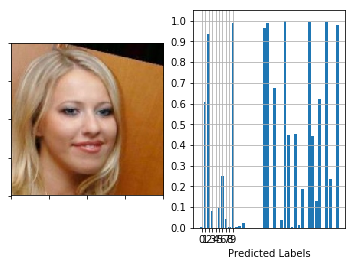

 >>>  [2.4959964e-03 6.0747004e-01 9.3663561e-01 8.0923572e-02 6.5902597e-05
 9.6366078e-02 2.4938087e-01 4.4640150e-02 3.0440819e-03 9.8994631e-01
 1.6885494e-03 1.0630161e-02 2.2262432e-02 4.4156113e-04 6.0933514e-04
 1.3647218e-06 2.1401145e-05 1.4134094e-03 9.6610069e-01 9.8738480e-01
 7.3736896e-06 6.7565894e-01 4.9059807e-05 3.8177460e-02 9.9970871e-01
 4.4808215e-01 5.6596054e-03 4.5304018e-01 1.3731609e-02 1.8707792e-01
 2.9623972e-05 9.9421906e-01 4.4155571e-01 1.2864211e-01 6.1972910e-01
 1.3225367e-03 9.9269629e-01 2.3553401e-01 9.1425427e-06 9.8021555e-01]
 >>> features[idx].shape =  (6, 6, 32)
 >>> features_for_one_img.shape =  (6, 6, 32)
 >>> features_for_one_img.shape[0] =  6
 >>> features_for_one_img.shape[1] =  6
 >>> height_roomout =  33.333333333333336  width_roomout =  33.333333333333336
 >>> after resize =  (200, 200, 32)
 (x) =  [15 20 38 16 30 22  4 13 14 35 17 10  0  8 26 11 28 12 23  7  3  5 33 29
 37  6 32 25 27  1 34 21  2 18 39 19  9 36 31 24]
 >>> i =  1  p

<Figure size 432x288 with 0 Axes>

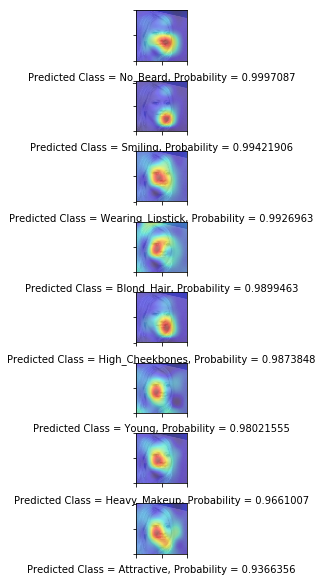

In [90]:
#--- create the new model ------------------------------------------------------
from keras.models import Model
from keras import backend as K
import scipy

gap_weights = model.layers[-1].get_weights()[0]
print(" >>> size(gap_weights) = ", gap_weights.size)

cam_model = Model(inputs=model.input, 
                    outputs=(model.layers[-3].output, model.layers[-1].output)) 
print(" >>> K.int_shape(model.layers[-3].output) = ", K.int_shape(model.layers[-3].output))
print(" >>> K.int_shape(model.layers[-1].output) = ", K.int_shape(model.layers[-1].output))

#--- make the prediction
features, results = cam_model.predict(test_img)

#--- check the prediction for 3 test images
for idx in range(1):
    plt.figure(facecolor='white')
    
    ax = plt.subplot(1, 2, 1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.imshow(v_pic[idx])
    
#     plt.xlabel("Real Labels: " + t_int[idx])
#     plt.title(t_str[idx])
    
    plt.subplot(1, 2, 2)
    plt.bar(range(40), results[idx])
    plt.xticks(np.arange(0, 9.1, 1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel("Predicted Labels")
    plt.grid()
    
    plt.show()        
    
    print(" >>> ", results[idx])
    
    print(" >>> features[idx].shape = ", features[idx].shape)
    
    features_for_one_img = features[idx, :, :, :]
    print(" >>> features_for_one_img.shape = ", features_for_one_img.shape)
    print(" >>> features_for_one_img.shape[0] = ", features_for_one_img.shape[0])
    print(" >>> features_for_one_img.shape[1] = ", features_for_one_img.shape[1])

    height_roomout = 200 / features_for_one_img.shape[0]
    width_roomout = 200 / features_for_one_img.shape[1]
    
    print(" >>> height_roomout = ", height_roomout, " width_roomout = ", width_roomout)
    
    cam_features = scipy.ndimage.zoom(features_for_one_img, (height_roomout, width_roomout, 1), order=2)
    
    print(" >>> after resize = ", cam_features.shape)
    
#     for n, v in enumerate(results[idx]):
#         print(" (n, v) = ", n , v)
        
    x = np.argsort(results[idx])
    print(" (x) = ", x)
    
    plt.figure(facecolor='white')
    plt.figure(figsize=(10,10))
    for i in range(1, 9):
        
        pred = x[0-i]
        print(" >>> i = ", i, " pred = ", pred)
        
        cam_weights = gap_weights[:, pred]

        cam_output = np.dot(cam_features, cam_weights)
        
        ax = plt.subplot(8, 1, i)
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        buf = 'Predicted Class = ' + columns[pred] + ', Probability = ' + str(results[idx][pred])
        plt.xlabel(buf)
        
        plt.imshow(v_pic[idx], alpha=0.5)
        plt.imshow(cam_output, cmap='jet', alpha=0.5)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
     
    plt.show()  

In [56]:
from keras.models import load_model

model.save('faceattr_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')

In [57]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

#save
with open('history.json', 'w') as fp:
    json.dump(str(history_dict), fp)